In [5]:
import numpy as np
import pandas as pd

import os

import datetime, warnings
warnings.filterwarnings("ignore")

import kagglehub

In [6]:
path = kagglehub.dataset_download("hrishitpatil/flight-data-2024")

print("Path to dataset files:", path)

data_path = os.path.join( path, 'flight_data_2024.csv')

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\hrishitpatil\flight-data-2024\versions\2


In [7]:
def ver_df(path, columna_buscar):
    df = pd.read_csv(path, encoding='utf-8', sep=',')

    print(f"cantidad de muestras: {df.shape[0]}")
    print(f"cantidad de columnas: {df.shape[1]}")
    #print(f'Demo del data frame: \n{df.head(15)}')
    print(f'info del data frame: \n{df.info()}')
    print(f'descripción del data frame: \n{df.describe()}')
    print(f'columnas con valores nulos: \n{df.isna().sum()}')
    print(f'cantidad de valores del data frame: \n{df[columna_buscar].value_counts()}')
    print(f"cantidad de muestras validas: \n {df.shape[0]-df[columna_buscar].isna().sum()}")
    return df

# EDA de los datos

In [9]:
df = ver_df(data_path, 'arr_delay')

cantidad de muestras: 7079081
cantidad de columnas: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay  

## Limpieza data set base

In [12]:
def limpieza_dataset_base(df):
    
    df.drop_duplicates(inplace=True)
    
    df['distancia_km'] = df['distance'] * 1.60934
    
    columnas_con_nulos = ['op_carrier_fl_num', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'arr_delay', 'actual_elapsed_time','actual_elapsed_time', 'air_time']
                          

    df.dropna(subset=columnas_con_nulos, inplace=True)
    
    df['distancia_km'] = df['distance'] * 1.60934
    
    df['retraso'] = np.where(df['arr_delay']>0, 1, 0)
    
    df['dep_hour'] = (df['dep_time']//100).astype(int)
    bins = [0, 6, 12, 18, 24]
    labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
    df['bloque_horario'] = pd.cut(df['dep_hour'], bins=bins, labels=labels, include_lowest=True)
    df['is_weekend'] = df['day_of_week'].isin([6, 7]).astype(int)

    total_filas = len(df)

    print(total_filas)
    
    return df

In [13]:
df = limpieza_dataset_base(df)

6965266


In [14]:
columnas_basura = ['cancellation_code', 'distance', 'fl_date', 'cancelled', 'arr_delay','dep_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df.drop(columns=columnas_basura, inplace=True)

## Exploración de los datos

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = df['retraso'].groupby(df['op_unique_carrier']).value_counts()

Text(0, 0.5, 'Cantidad de vuelos')

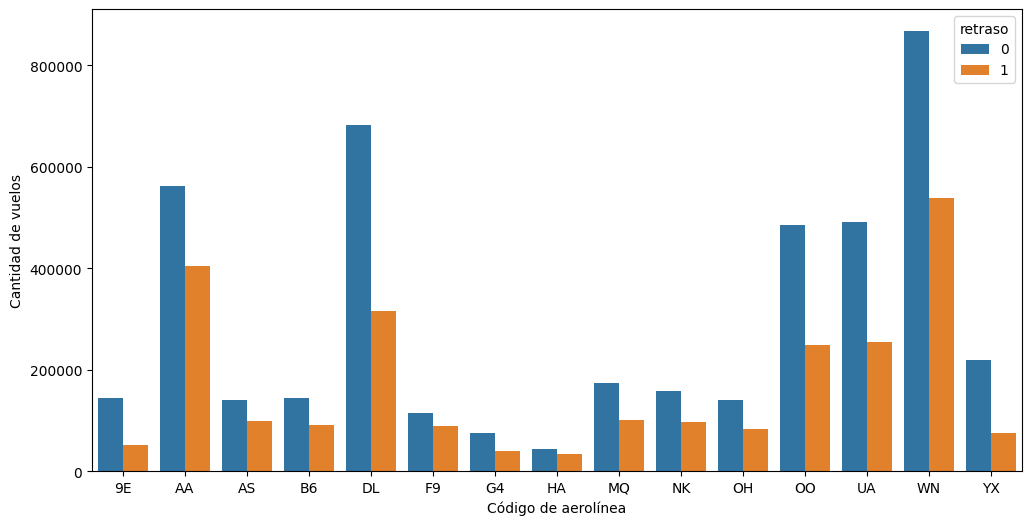

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data.index.get_level_values(0), y=data.values, hue=data.index.get_level_values(1))
plt.xlabel('Código de aerolínea')
plt.ylabel('Cantidad de vuelos')

In [18]:
data = df['retraso'].groupby(df['origin']).value_counts()
top10_origen = data.nlargest(10)

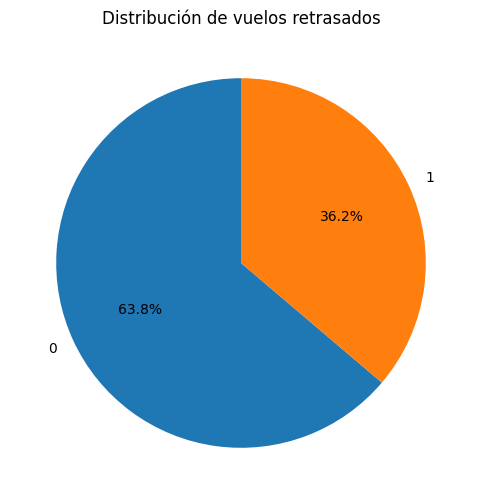

In [19]:
data = df['retraso'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de vuelos retrasados')
plt.show()

Text(0, 0.5, 'Cantidad de vuelos')

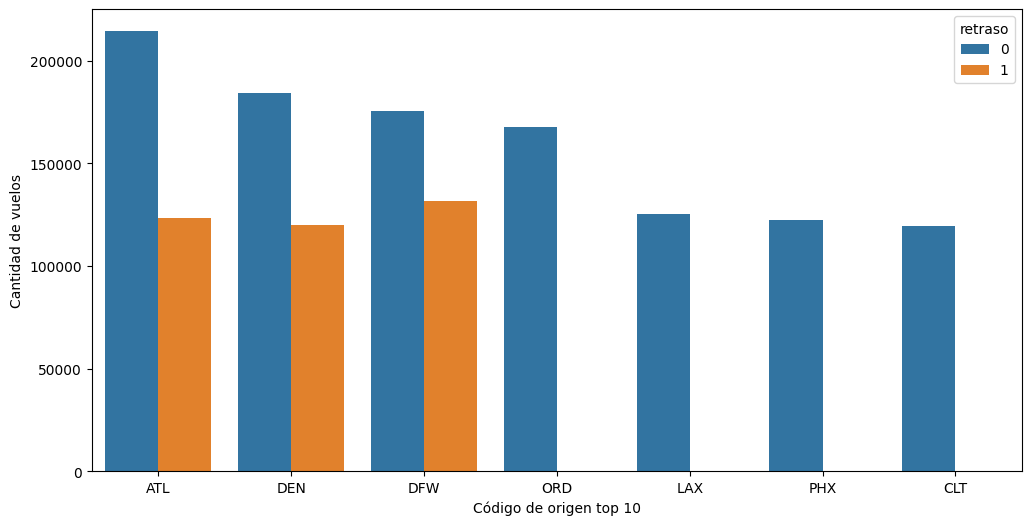

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_origen.index.get_level_values(0), y=top10_origen.values, hue=top10_origen.index.get_level_values(1))
plt.xlabel('Código de origen top 10')
plt.ylabel('Cantidad de vuelos')

In [73]:
aerolineas = {'9E': 'Endeavor Air', 'AA': 'American Airlines', 'AS': 'Alaska Airlines', 'B6': 'JetBlue Airways', 'DL': 'Delta Air Lines', 'F9': 'Frontier Airlines', 'G4': 'Allegiant Air', 'HA': 'Hawaiian Airlines', 'MQ': 'Envoy Air', 'NK': 'Spirit Airlines', 'OH': 'PSA Airlines', 'OO': 'SkyWest Airlines', 'UA': 'United Airlines', 'WN': 'Southwest Airlines', 'YX': 'Republic Airways'}

In [82]:
aeropuertos_llegada = df['dest'].value_counts().head(10)
aeropuertos_salida = df['origin'].value_counts().head(10)

print("Aeropuertos de llegada más frecuentes:")
print(aeropuertos_llegada.head(10))

print("Aeropuertos de salida más frecuentes:")
print(aeropuertos_salida.head(10))

Aeropuertos de llegada más frecuentes:
dest
ATL    337702
DFW    306222
DEN    304039
ORD    275155
CLT    214036
LAX    192110
PHX    192021
LAS    187309
SEA    161399
LGA    158007
Name: count, dtype: int64
Aeropuertos de salida más frecuentes:
origin
ATL    337662
DFW    306872
DEN    304323
ORD    275505
CLT    214096
LAX    191903
PHX    191868
LAS    186853
SEA    161520
LGA    158152
Name: count, dtype: int64


In [78]:
import plotly.express as px

In [86]:
top_aeropuertos = pd.concat([
    aeropuertos_llegada.reset_index().rename(columns={'dest': 'Aeropuerto', 0: 'Conteo'}),
    aeropuertos_salida.reset_index().rename(columns={'origin': 'Aeropuerto', 0: 'Conteo'})
])

top_aeropuertos['Tipo'] = ['Llegada'] * 10 + ['Salida'] * 10

In [87]:
top_aeropuertos

,Aeropuerto,count,Tipo
0,ATL,337702,Llegada
1,DFW,306222,Llegada
2,DEN,304039,Llegada
3,ORD,275155,Llegada
4,CLT,214036,Llegada
5,LAX,192110,Llegada
6,PHX,192021,Llegada
7,LAS,187309,Llegada
8,SEA,161399,Llegada
9,LGA,158007,Llegada


In [90]:
fig_comp = px.bar(
    top_aeropuertos,
    x='count',
    y='Aeropuerto',
    color='Tipo',
    orientation='h',
    barmode='group',  
    title='Comparación Top 10 Aeropuertos: Llegadas en 2024'
)
fig_comp.show()

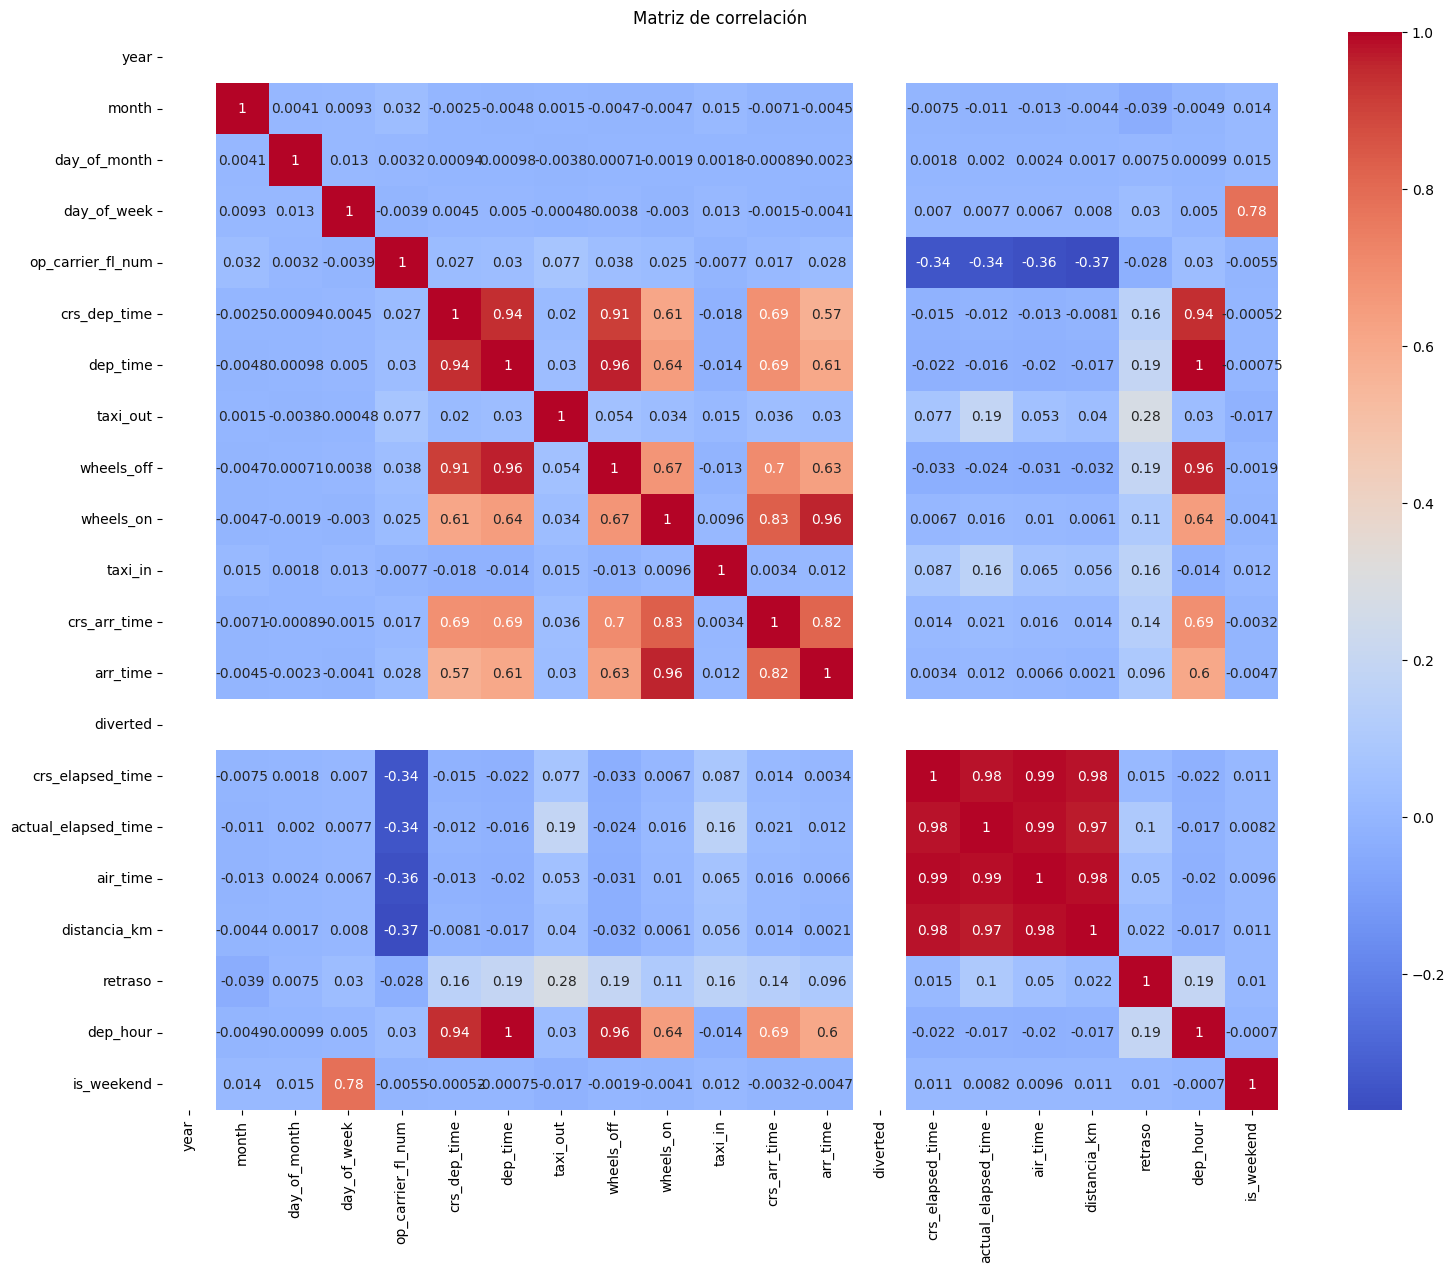

In [21]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### Configuración previa al modelado

In [22]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder, StandardScaler

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay, r2_score

In [24]:
from sklearn.linear_model import LogisticRegression

## Creación datos de entranamiento y prueba

In [25]:
y = df['retraso']
X = df.drop(['retraso'], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200, stratify=y, shuffle=True)

In [37]:
from sklearn.compose import make_column_selector as selector
cat_selector = selector(dtype_include=['object', 'category'])
variables_categoricas = cat_selector(X_train)

In [38]:
scaler = StandardScaler(with_mean=False)

# **Modelo histgradient base**

In [39]:
Preprocessor_hist = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), variables_categoricas),
    remainder='passthrough'
)

modelo_hist = Pipeline(steps=[
    ('preprocessor', Preprocessor_hist),
    ('classifier', HistGradientBoostingClassifier(
        random_state=200,
        class_weight='balanced',
        max_iter=200
         
    ))
])

modelo_hist.fit(X_train, y_train)

y_pred = modelo_hist.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción antes de las mejoras:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.9580095243974749
predicción antes de las mejoras:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97    888652
           1       0.94      0.95      0.94    504402

    accuracy                           0.96   1393054
   macro avg       0.95      0.96      0.95   1393054
weighted avg       0.96      0.96      0.96   1393054



## Revisión de la importancia de las variables en el modelo

In [40]:
from sklearn.inspection import permutation_importance


result = permutation_importance(modelo_hist, X_test.head(10000), y_test.head(10000), n_repeats=5, random_state=200)

for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.3f}")

dep_time: 0.346
crs_dep_time: 0.324
arr_time: 0.280
crs_arr_time: 0.280
crs_elapsed_time: 0.232
actual_elapsed_time: 0.187
taxi_out: 0.025
air_time: 0.022
wheels_on: 0.016
taxi_in: 0.009
dep_hour: 0.002
wheels_off: 0.000
op_unique_carrier: 0.000
op_carrier_fl_num: 0.000
dest_city_name: 0.000
is_weekend: 0.000
diverted: 0.000
distancia_km: 0.000
year: 0.000
dest_state_nm: -0.000
dest: -0.000
day_of_month: -0.000
bloque_horario: -0.000
origin_state_nm: -0.000
origin: -0.000
origin_city_name: -0.000
day_of_week: -0.001
month: -0.001


## Modelo con la variables reales

In [41]:
variables_numericas_reales = ['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distancia_km', 'is_weekend']
variables_categoricas_reales = ['op_unique_carrier', 'dest', 'origin', 'day_of_week', 'month', 'day_of_month', 'bloque_horario']

Preprocessor_target = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas_reales),
        ('cat', TargetEncoder(target_type='binary', random_state=200), variables_categoricas_reales)
    ],
    remainder='drop'
)

modelo_hist_target = Pipeline(steps=[
    ('preprocessor', Preprocessor_target),
    ('classifier', HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=200,
        learning_rate=0.03,
        max_iter=500,
        l2_regularization=1.5
    ))
])


modelo_hist_target.fit(X_train, y_train)

y_pred = modelo_hist_target.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.6685404873034355
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73    888652
           1       0.54      0.60      0.57    504402

    accuracy                           0.67   1393054
   macro avg       0.65      0.65      0.65   1393054
weighted avg       0.68      0.67      0.67   1393054



## Modelo usando target como ajuste final

In [42]:
variables_reales = [
    'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 
    'distancia_km', 'op_unique_carrier', 'dest', 'origin', 
    'day_of_week', 'month', 'day_of_month'
]

variables_numericas_reales = ['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distancia_km']
variables_categoricas_reales = ['op_unique_carrier', 'dest', 'origin', 'day_of_week', 'month', 'day_of_month']

scaler = StandardScaler(with_mean=False)

Preprocessor_target = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas_reales),
        ('cat', TargetEncoder(target_type='binary', random_state=200), variables_categoricas_reales)
    ],
    remainder='drop'
)

modelo_hist_target = Pipeline(steps=[
    ('preprocessor', Preprocessor_target),
    ('classifier', HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=200,
        learning_rate=0.05,
        max_iter=200
    ))
])

modelo_hist_target.fit(X_train, y_train)

y_pred = modelo_hist_target.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.6312583718936954
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69    888652
           1       0.49      0.60      0.54    504402

    accuracy                           0.63   1393054
   macro avg       0.62      0.62      0.62   1393054
weighted avg       0.65      0.63      0.64   1393054



[[578829 309823]
 [203854 300548]]


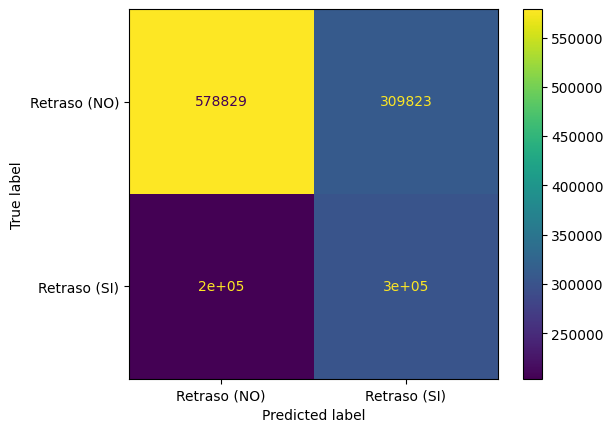

In [43]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['Retraso (NO)', 'Retraso (SI)'])
visualizacion.plot()

## Modelo de comparación Logisticregresseion

In [45]:
Preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, variables_numericas_reales), 
        ('cat', OneHotEncoder(
            drop="if_binary", 
            handle_unknown="ignore", 
            sparse_output=True  
        ), variables_categoricas_reales)  
    ],
    remainder='drop',
    sparse_threshold=1.0  
)

modelo_logistico = Pipeline(steps=[
    ('preprocessor', Preprocessor), 
    ('classifier', LogisticRegression(
        random_state=200,
        class_weight='balanced',
        solver='saga',      
        max_iter=250,       
        n_jobs=-1,          
        warm_start=True
    ))
])


modelo_logistico.fit(X_train, y_train)

y_pred = modelo_logistico.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción antes de las mejoras:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.6084279575666126
predicción antes de las mejoras:
               precision    recall  f1-score   support

           0       0.73      0.61      0.66    888652
           1       0.47      0.61      0.53    504402

    accuracy                           0.61   1393054
   macro avg       0.60      0.61      0.60   1393054
weighted avg       0.64      0.61      0.62   1393054



[[538486 350166]
 [195315 309087]]


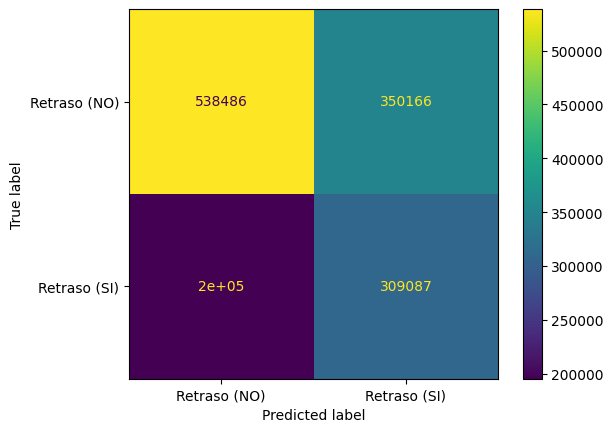

In [47]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['Retraso (NO)', 'Retraso (SI)'])
visualizacion.plot()

# Extra integración de las variables climatologícas

In [46]:
df_vuelos = ver_df(data_path, 'arr_delay')

cantidad de muestras: 7079081
cantidad de columnas: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay  

In [48]:
df_clima = ver_df('./flight_data.csv', 'Departure_Airport')

cantidad de muestras: 10000
cantidad de columnas: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Flight_ID            10000 non-null  int64 
 1   Date                 10000 non-null  object
 2   Time                 10000 non-null  object
 3   Departure_Airport    10000 non-null  object
 4   Arrival_Airport      10000 non-null  object
 5   Temperature_Celsius  10000 non-null  int64 
 6   Wind_Speed_knots     10000 non-null  int64 
 7   Turbulence_Level     10000 non-null  object
 8   Visibility_km        10000 non-null  object
dtypes: int64(3), object(6)
memory usage: 703.3+ KB
info del data frame: 
None
descripción del data frame: 
          Flight_ID  Temperature_Celsius  Wind_Speed_knots
count  10000.000000         10000.000000      10000.000000
mean     100.685700            10.314800         24.906100
std       57.3923

In [49]:
df_vuelos['fl_date'] = pd.to_datetime(df_vuelos['fl_date'], format='%Y-%m-%d')
df_vuelos['dep_hour'] = df_vuelos['dep_time']

df_clima['Date'] = pd.to_datetime(df_clima['Date'], format='%Y-%m-%d')

df_clima['fl_date'] = df_clima['Date']
df_clima.drop(columns=['Date'], inplace=True)

df_clima['merge_hour'] = df_clima['Time'].str.split(':').str[0].astype(int)

df_vuelos['merge_hour'] = df_vuelos['crs_dep_time'] // 100

df_clima.rename(columns={'Departure_Airport': 'origin'}, inplace=True)

df_clima['origin'] = df_clima['origin'].str.replace(' Airport', '', case=False).str.strip()

In [51]:
df_vuelos['fl_date'].head()

0   2024-01-01
1   2024-01-01
2   2024-01-01
3   2024-01-01
4   2024-01-01
Name: fl_date, dtype: datetime64[ns]

In [50]:
df_clima['fl_date'].head()

0   2024-10-11
1   2024-01-20
2   2024-12-26
3   2024-08-19
4   2024-12-07
Name: fl_date, dtype: datetime64[ns]

In [52]:
df_vuelos['fl_date'] = pd.to_datetime(df_vuelos['fl_date']).dt.normalize()
df_clima['fl_date'] = pd.to_datetime(df_clima['fl_date']).dt.normalize()

df_vuelos['merge_hour'] = df_vuelos['merge_hour'].astype(int)
df_clima['merge_hour'] = df_clima['merge_hour'].astype(int)

df_vuelos['origin'] = df_vuelos['origin'].astype(str).str.strip()
df_clima['origin'] = df_clima['origin'].astype(str).str.strip()

In [53]:
df_unido = pd.merge(
    df_vuelos, 
    df_clima, 
    on=['fl_date', 'merge_hour', 'origin'], 
    how='left'
)

In [54]:
df_unido.sample(5)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,late_aircraft_delay,dep_hour,merge_hour,Flight_ID,Time,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km
3385756,2024,6,27,4,2024-06-27,AS,959.0,SEA,"Seattle, WA",Washington,...,24,2319.0,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2328177,2024,5,5,7,2024-05-05,MQ,3542.0,ORD,"Chicago, IL",Illinois,...,0,1502.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3085543,2024,6,12,3,2024-06-12,OO,4146.0,BNA,"Nashville, TN",Tennessee,...,0,704.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3048152,2024,6,10,1,2024-06-10,UA,486.0,MCO,"Orlando, FL",Florida,...,0,1059.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311875,2024,10,1,2,2024-10-01,OO,5692.0,XNA,"Fayetteville, AR",Arkansas,...,0,1133.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
print(f"cantidad de muestras: {df_unido.shape[0]-df_unido.isna().sum()}")

cantidad de muestras: year                   7082787
month                  7082787
day_of_month           7082787
day_of_week            7082787
fl_date                7082787
op_unique_carrier      7082787
op_carrier_fl_num      7082786
origin                 7082787
origin_city_name       7082787
origin_state_nm        7082787
dest                   7082787
dest_city_name         7082787
dest_state_nm          7082787
crs_dep_time           7082787
dep_time               6990067
dep_delay              6989756
taxi_out               6986991
wheels_off             6986991
wheels_on              6984867
taxi_in                6984867
crs_arr_time           7082787
arr_time               6984869
arr_delay              6968898
cancelled              7082787
cancellation_code        96377
diverted               7082787
crs_elapsed_time       7082786
actual_elapsed_time    6968898
air_time               6968898
distance               7082787
carrier_delay          7082787
weather_delay    

In [56]:
print(f"catidad de nan:\n {df_unido.isna().sum()}")

catidad de nan:
 year                         0
month                        0
day_of_month                 0
day_of_week                  0
fl_date                      0
op_unique_carrier            0
op_carrier_fl_num            1
origin                       0
origin_city_name             0
origin_state_nm              0
dest                         0
dest_city_name               0
dest_state_nm                0
crs_dep_time                 0
dep_time                 92720
dep_delay                93031
taxi_out                 95796
wheels_off               95796
wheels_on                97920
taxi_in                  97920
crs_arr_time                 0
arr_time                 97918
arr_delay               113889
cancelled                    0
cancellation_code      6986410
diverted                     0
crs_elapsed_time             1
actual_elapsed_time     113889
air_time                113889
distance                     0
carrier_delay                0
weather_delay         

In [57]:
def limpieza_dataset_clima(df):
    
    df.drop_duplicates(inplace=True)
    
    df['distancia_km'] = df['distance'] * 1.60934
    
    columnas_con_nulos = ['op_carrier_fl_num', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'arr_delay', 'actual_elapsed_time','actual_elapsed_time', 'air_time', 'dep_hour',
                          'Temperature_Celsius']

    df.dropna(subset=columnas_con_nulos, inplace=True)
    
    df['distancia_km'] = df['distance'] * 1.60934
    
    df['retraso'] = np.where(df['arr_delay']>0, 1, 0)
    
    df['dep_hour'] = (df['dep_time']//100).astype(int)
    bins = [0, 6, 12, 18, 24]
    labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
    df['bloque_horario'] = pd.cut(df['dep_hour'], bins=bins, labels=labels, include_lowest=True)
    df['is_weekend'] = df['day_of_week'].isin([6, 7]).astype(int)

    total_filas = len(df)

    print(total_filas)
    
    return df

In [58]:
df_unido_limpio = limpieza_dataset_clima(df_unido)

159170


In [59]:
print(f"catidad de nan:\n {df_unido_limpio.isna().sum()}")

catidad de nan:
 year                        0
month                       0
day_of_month                0
day_of_week                 0
fl_date                     0
op_unique_carrier           0
op_carrier_fl_num           0
origin                      0
origin_city_name            0
origin_state_nm             0
dest                        0
dest_city_name              0
dest_state_nm               0
crs_dep_time                0
dep_time                    0
dep_delay                   0
taxi_out                    0
wheels_off                  0
wheels_on                   0
taxi_in                     0
crs_arr_time                0
arr_time                    0
arr_delay                   0
cancelled                   0
cancellation_code      159170
diverted                    0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                    0
distance                    0
carrier_delay               0
weather_delay               0
nas_delay              

In [60]:
columnas_basura = ['cancellation_code', 'distance', 'fl_date', 'cancelled', 'arr_delay','dep_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'Arrival_Airport','Flight_ID']

df_unido_limpio.drop(columns=columnas_basura, inplace=True)

In [61]:
X = df_unido_limpio.drop(['retraso'], axis=1)
y = df_unido_limpio['retraso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200, stratify=y, shuffle=True)

## Modelo con las variables climaticas

In [62]:
variables_numericas_reales = ['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distancia_km', 'is_weekend', 'Temperature_Celsius', 'Wind_Speed_knots', 'Visibility_km']
variables_categoricas_reales = ['op_unique_carrier', 'dest', 'origin', 'day_of_week', 'month', 'day_of_month', 'bloque_horario', 'Turbulence_Level']

scaler = StandardScaler(with_mean=False)

Preprocessor_target = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas_reales),
        ('cat', TargetEncoder(target_type='binary', random_state=200), variables_categoricas_reales)
    ],
    remainder='drop'
)

modelo_hist_target_clima = Pipeline(steps=[
    ('preprocessor', Preprocessor_target),
    ('classifier', HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=200,
        learning_rate=0.03,
        max_iter=500,
        l2_regularization=1.5,
        max_depth=10,             
        max_leaf_nodes=31,        
        early_stopping=True,      
        validation_fraction=0.1,  
        n_iter_no_change=10
    ))
])


modelo_hist_target_clima.fit(X_train, y_train)

y_pred = modelo_hist_target_clima.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.6690959351636615
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73     19804
           1       0.56      0.60      0.58     12030

    accuracy                           0.67     31834
   macro avg       0.65      0.66      0.65     31834
weighted avg       0.68      0.67      0.67     31834



                Feature  Importance
32       bloque_horario    0.199610
12         crs_dep_time    0.195775
1                 month    0.034228
4     op_unique_carrier    0.015606
3           day_of_week    0.011346
31         distancia_km    0.009575
18         crs_arr_time    0.008450
21     crs_elapsed_time    0.007721
2          day_of_month    0.005491
6                origin    0.005211
27  Temperature_Celsius    0.005042
9                  dest    0.004068
30        Visibility_km    0.003735
28     Wind_Speed_knots    0.003091
29     Turbulence_Level    0.001593


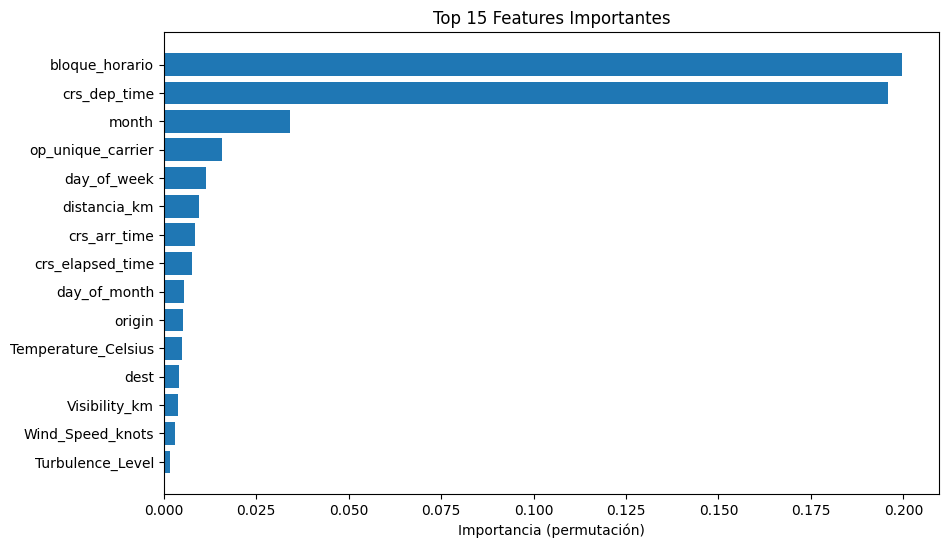

In [63]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    modelo_hist_target_clima,            
    X_test,           
    y_test,           
    n_repeats=10,     
    random_state=200, 
    n_jobs=-1         
)

importances = result.importances_mean
feature_names = X_train.columns


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(15))  


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(15), importance_df['Importance'].head(15))
plt.xlabel('Importancia (permutación)')
plt.title('Top 15 Features Importantes')
plt.gca().invert_yaxis()
plt.show()

## Modelo final

In [64]:
variables_finales = [
    'bloque_horario', 'crs_dep_time', 'month', 'op_unique_carrier', 
    'day_of_week', 'distancia_km', 'crs_arr_time', 'crs_elapsed_time', 
    'day_of_month', 'origin', 'Temperature_Celsius', 'dest', 'Visibility_km'
]

X_test_reduced = X_test[variables_finales]


num_final = [v for v in variables_finales if v in variables_numericas_reales]
cat_final = [v for v in variables_finales if v in variables_categoricas_reales]


Preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_final),
        ('cat', TargetEncoder(target_type='binary', random_state=200), cat_final)
    ]
)

modelo_hist_target_clima = Pipeline(steps=[
    ('preprocessor', Preprocessor_target),
    ('classifier', HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=200,
        learning_rate=0.03,
        max_iter=500,
        l2_regularization=1.5,
        max_depth=10,             
        max_leaf_nodes=31,        
        early_stopping=True,      
        validation_fraction=0.1,  
        n_iter_no_change=10
    ))
])


modelo_hist_target_clima.fit(X_train, y_train)

y_pred = modelo_hist_target_clima.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.6690959351636615
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73     19804
           1       0.56      0.60      0.58     12030

    accuracy                           0.67     31834
   macro avg       0.65      0.66      0.65     31834
weighted avg       0.68      0.67      0.67     31834



## Modelo contraste final

In [67]:
scaler2 = StandardScaler()

Preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_final), 
        ('cat', OneHotEncoder(
            drop="if_binary", 
            handle_unknown="ignore", 
            sparse_output=True  
        ), cat_final)  
    ],
    remainder='drop',
    sparse_threshold=1.0  
)

modelo_logistico = Pipeline(steps=[
    ('preprocessor', Preprocessor), 
    ('classifier', LogisticRegression(
        random_state=200,
        class_weight='balanced',
        solver='saga',      
        max_iter=250,       
        n_jobs=-1,          
        warm_start=True
    ))
])


modelo_logistico.fit(X_train, y_train)

y_pred = modelo_logistico.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción antes de las mejoras:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.6141546773889552
predicción antes de las mejoras:
               precision    recall  f1-score   support

           0       0.73      0.61      0.66     19804
           1       0.49      0.62      0.55     12030

    accuracy                           0.61     31834
   macro avg       0.61      0.62      0.61     31834
weighted avg       0.64      0.61      0.62     31834



## Randonized grid con el mejor modelo

In [68]:
param_dist = {
    'classifier__learning_rate': [0.01, 0.03, 0.1],
    'classifier__max_iter': [300, 500, 700],
    'classifier__max_depth': [5, 10, 20, None],
    'classifier__l2_regularization': [0.1, 1.5, 5.0],
    'classifier__max_leaf_nodes': [15, 31, 63]
}

random_search = RandomizedSearchCV(
    modelo_hist_target_clima, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=3, 
    scoring='recall_macro', 
    random_state=200,
    n_jobs=-1 
)

random_search.fit(X_train, y_train)

print(f"Mejor score (recall) encontrado: {random_search.best_score_}")

print(f"Mejores parámetros: {random_search.best_params_}") 

Mejor score (recall) encontrado: 0.6568723013403469
Mejores parámetros: {'classifier__max_leaf_nodes': 63, 'classifier__max_iter': 700, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.03, 'classifier__l2_regularization': 5.0}


In [69]:
y_pred = random_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.6757554815605956
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73     19804
           1       0.57      0.61      0.59     12030

    accuracy                           0.68     31834
   macro avg       0.66      0.66      0.66     31834
weighted avg       0.68      0.68      0.68     31834



[[14214  5590]
 [ 4732  7298]]


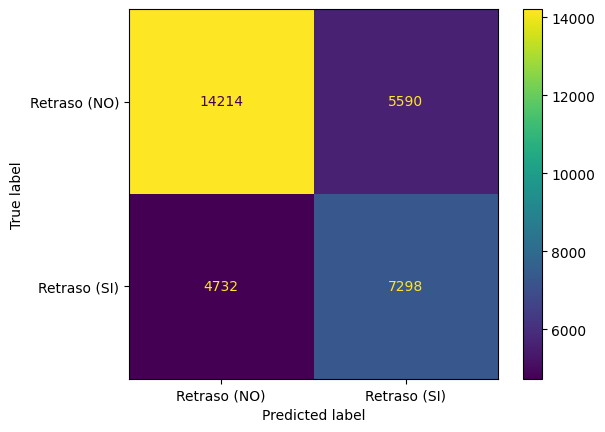

In [70]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['Retraso (NO)', 'Retraso (SI)'])
visualizacion.plot()

## Guardado del modelo champion

In [71]:
import joblib

In [ ]:
joblib.dump(random_search.best_estimator_, 'champion_clima.joblib', compress=3)

['champion.joblib']